# Simple Linear Regression- Closed Form

A Simple Linear Regression fits a line to data points with two dimensions. It does this by defining and then minimizing a cost function. One of the most common methods used is ordinary least squares (OLS), which minimizes the square of the residuals of a line plotted against the data points.

<!-- TEASER_END -->

The line of a linear regression is given by the formula, with intercept $$w_{0}$$ and slope $$w_{1}$$

$$y=w_{0}+w_{1}x$$

In the case of simple linear regression, these coefficients can be measured by taking the partial derivatives of the cost function with respect to each coefficien, setting them to zero, doing a little algebra to separate the terms, and calculating each coefficient. The full derivation can be found at [wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression#Derivation_of_simple_regression_estimators).

The bottom line is that the closed form solution ends with these two equations:

$$\hat {w}_{0}=\dfrac {\sum ^{N}_{i=1}y_{i}}{N}-\hat {w}_{1}\dfrac {\sum ^{N}_{i=1}x_{i}}{N}$$

---

$$\hat {w}_{1}=\dfrac {\sum ^{N}_{i=1}y_{i}x_{i}-\dfrac {\sum ^{N}_{i=1}y_{i}\sum ^{N}_{i=1}x_{i}}{N}}{\sum ^{N}_{i=1}x^{2}_{i}-\dfrac {\sum ^{N}_{i=1}x_{i}\sum ^{N}_{i=1}x_{i}}{N}}$$

From this point, it's simple to write a python function that calculates the slope and intercept of a simple linear regression.

In [1]:
def simple_linear_regression(X, y):
    '''
    Returns slope and intercept for a simple regression line
    
    inputs- Works best with numpy arrays, though other similar data structures will work fine.
        X - input data
        y - output data
        
    outputs - floats
    '''
    # initial sums
    n = float(len(X))
    sum_x = X.sum()
    sum_y = y.sum()
    sum_xy = (X*y).sum()
    sum_xx = (X**2).sum()
    
    # formula for w0
    slope = (sum_xy - (sum_x*sum_y)/n)/(sum_xx - (sum_x*sum_x)/n)
    
    # formula for w1
    intercept = sum_y/n - slope*(sum_x/n)
    
    return (intercept, slope)

Now let's try it out on some data.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(199)

# generating some test points
X = np.array(range(10))
y = np.array([random.randint(1, 10) for x in range(10)])

A convenient way to check the fit is to make predictions across the range of the input data, then plot them against the original data.

In [5]:
intercept, slope = simple_linear_regression(X, y)

print ('Intercept: %.2f, Slope: %.2f' % (intercept, slope))

Intercept: 5.82, Slope: -0.05


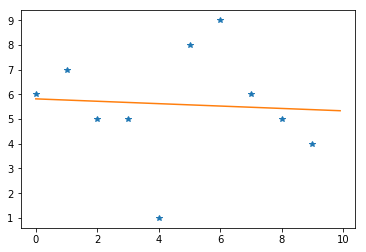

In [6]:
def reg_predictions(X, intercept, slope): 
    return ((slope*X) + intercept)

line_x = np.array([x/10. for x in range(100)])
line_y = reg_predictions(line_x, intercept, slope)
plt.plot(X, y, '*', line_x, line_y, '-')

The fit isn't very good, as expected for random data, but at least we can see the function in action. 